In [1]:
import QuantumToolbox.operators as qOps
import QuantumToolbox.liouvillian as liou
import QuantumToolbox.states as states

import numpy as np
import scipy.linalg as lina
import Plotting.SimplePlots as sPlt

# Eigenvector Statistics of Kicked-top of Different Symmetries
---
    M Kus, J Mostowski and F Haake
    Journal of Physics A: Mathematical and General, Volume 21, Number 22
    https://iopscience.iop.org/article/10.1088/0305-4470/21/22/006
---

 ## 1.COE

Parameters, Hamiltonian, and the Unitaries

In [ ]:
# Parameters
p = 1.7
j = 100
la = 6

# required operators
jz = qOps.Jz(j)
jy = qOps.Jy(j)
jzs = jz@jz

# Hamiltonians
h_o = p*jy
v_o = (la/(2*j + 1))*(jzs)

# Unitaries
U_ho = liou.Liouvillian(h_o)
U_o = liou.Liouvillian(v_o)@U_ho

# Eigenvectors of the U_o
vecs = lina.eig(U_o.A)[1]

# components of eigenvectors in the Jz basis
components = (np.abs(vecs.flatten()))**2

In [ ]:
# Plotting
bins = np.logspace(-5, -1, num=50, base=10.0)

# quasi-continuous PDF and linear axes
sPlt.pltEig(components, Dims=((2*j) + 1), Bins=bins, Step=False, logScale=False)

In [ ]:
# discrete PDF and log axes
sPlt.pltEig(components, Dims=((2*j) + 1), Bins=bins, Step=True, logScale=True)

 ## 2.CUE

Parameters, Hamiltonian, and the Unitaries

In [ ]:
# Parameters
pu = 1.7
ju = 100
ku = 6
kpu = 0.5

# required operators
jzu = qOps.Jz(ju)
jxu = qOps.Jx(ju)
jyu = qOps.Jy(ju)
jzsu = jzu@jzu
jxsu = jxu@jxu

# Hamiltonians
h_u = pu*jy
v_u1 = (ku/(2*j))*(jzsu)
v_u2 = (kpu/(2*j))*(jxsu)

# Unitaries
U_hu = liou.Liouvillian(h_u)
U_u1 = liou.Liouvillian(v_u1)@U_hu
U_u = liou.Liouvillian(v_u2)@U_u1

# Eigenvectors of the U_u
vecsu = lina.eig(U_u.toarray())[1]

# components of eigenvectors in the Jz basis
components = (np.abs(vecsu.flatten()))**2

In [ ]:
# discrete PDF and log axes
sPlt.pltEig(components, Dims=((2*ju) + 1), Bins=bins, Step=True, logScale=True)

 ## 3.CSE

Parameters, Hamiltonian, and the Unitaries

In [ ]:
# Parameters
ps = 2.5
js = 399.5
ks = 2.5
kps = 2
kpps = 3

# required operators
jz_s = qOps.Jz(js)
jy_s = qOps.Jy(js)
jx_s = qOps.Jx(js)
jzs_s = jz_s@jz_s

# Hamiltonians
h_s = (ps/js)*jzs_s
v_s = (ks/js)*(jzs_s + kps*(jx_s@jz_s + jz_s@jx_s) + kpps*(jx_s@jy_s + jy_s@jx_s))

# Unitaries
U_hs = liou.Liouvillian(h_s)
U_s = liou.Liouvillian(v_s)@U_hs

# Eigenvectors of the U_s
vecss = lina.eig(U_s.toarray())[1]

# components of eigenvectors in the Jz basis & taking the degeneracy into account
components = []
for i in range(len(vecss)):
    el = 0
    for k in range(int(len(vecss)/2)-2):
        p1 = (np.abs(vecss[:,i][el]))**2
        p2 = (np.abs(vecss[:,i][el+1]))**2
        el += 2
        components.append(p1+p2)

In [ ]:
# discrete PDF and log axes
sPlt.pltEig(components, Dims=((2*js) + 1), Bins=bins, Step=True, logScale=True)

# Eigenvector Statistics for Digital Ising Simulation 
---
    L. M. Sieberer, T. Olsacher, A. Elben, M. Heyl, P. Hauke, F. Haake, and P. Zoller
    npj Quantum Information volume 5, Article number: 78 (2019)
    https://www.nature.com/articles/s41534-019-0192-5
---
This digital quantum simulation maps to kicked-top, and the goal below is to find j value at which system is sensibly chaotic. <br/>
Note: I'm not following *exactly* their model

In [4]:

def IsingDS(jv):
    # parameters
    p = 0.1
    la = 1

    # Trotter step size
    tau = 10

    # required operators
    jz = qOps.Jz(jv)
    jx = qOps.Jx(jv)
    jzs = jz @ jz

    # Hamiltonians
    h_o = p * jx
    v_o = (la / (((2 * jv) + 1))) * (jzs)

    #Unitaries
    U_ho = liou.Liouvillian(tau * h_o)
    U_o = liou.Liouvillian(tau * v_o) @ U_ho

    # Eigenvectors
    vecsi = lina.eig(U_o.toarray())[1]


    # components of eigenvectors in the Jz basis
    components = (np.abs(vecsi.flatten()))**2
    
    return components   

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


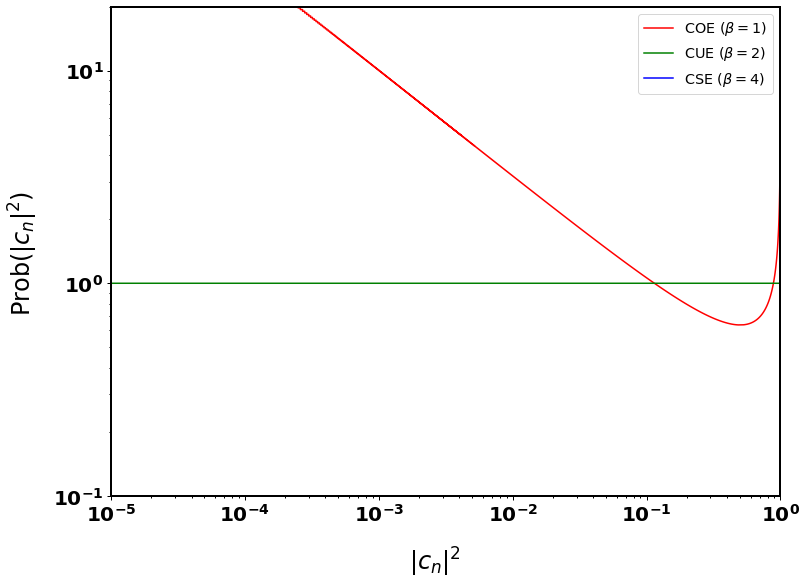

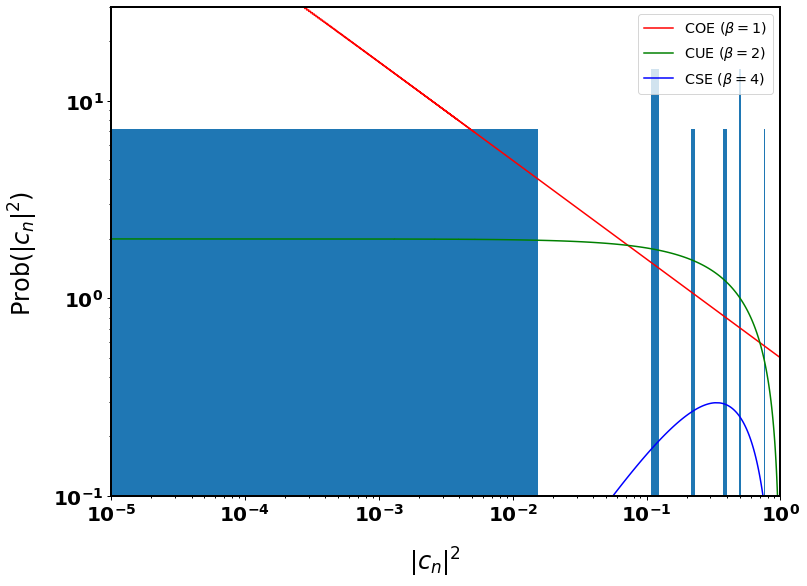

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


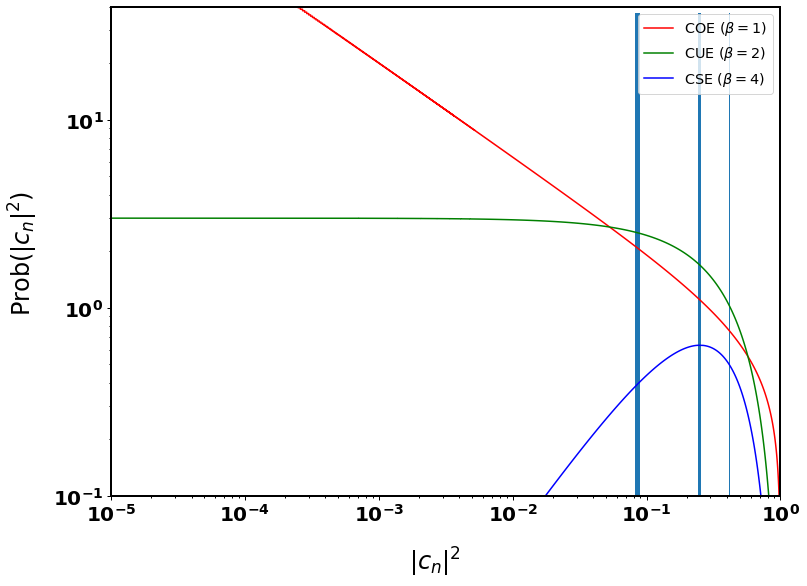

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


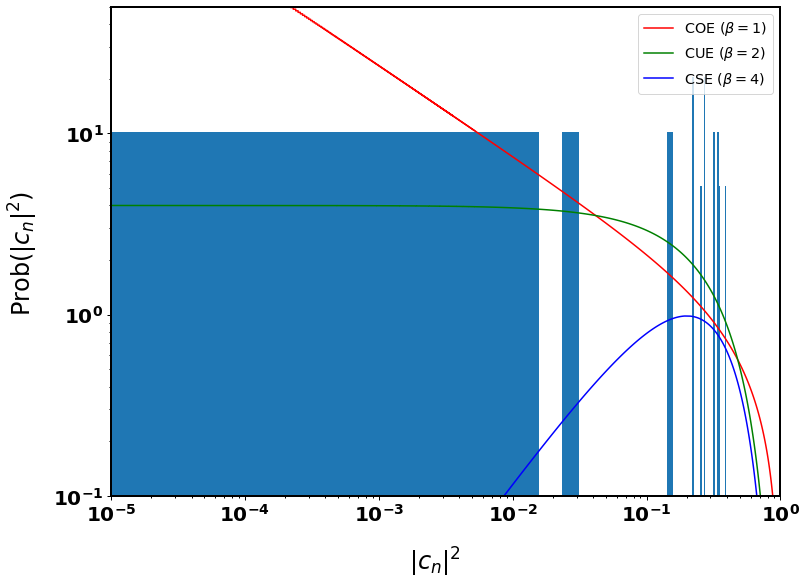

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


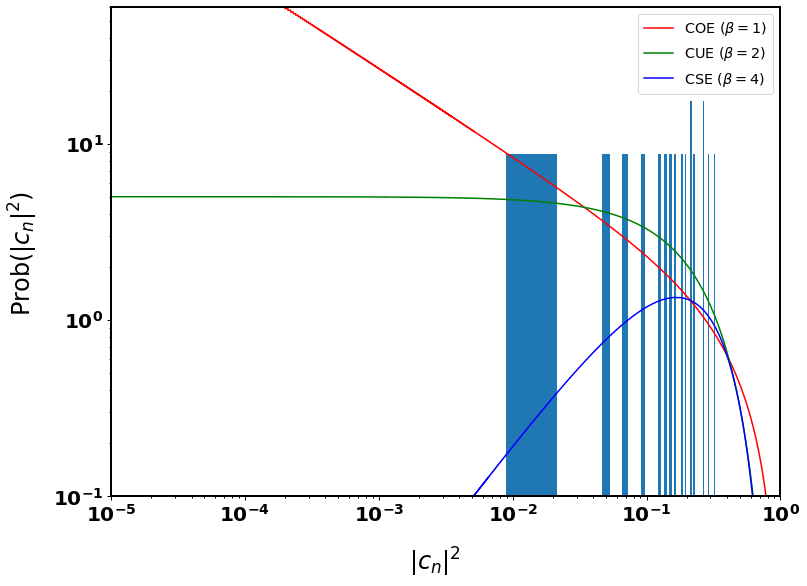

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


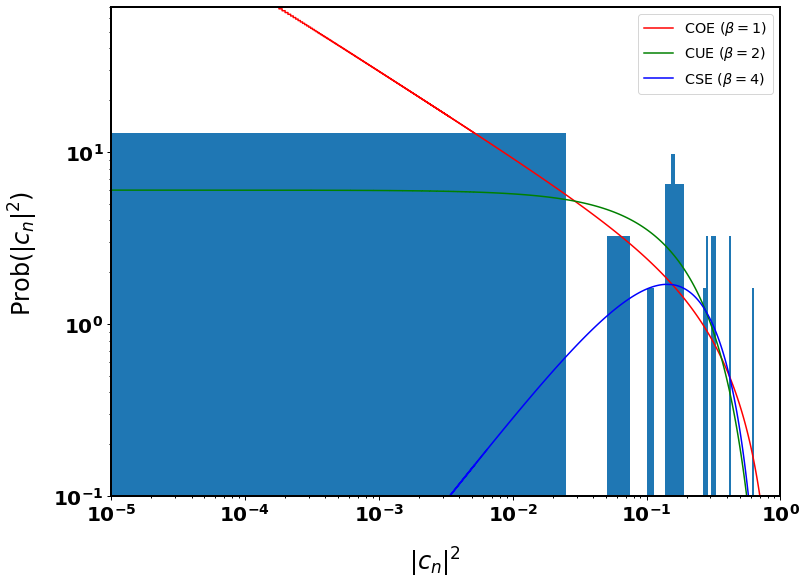

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


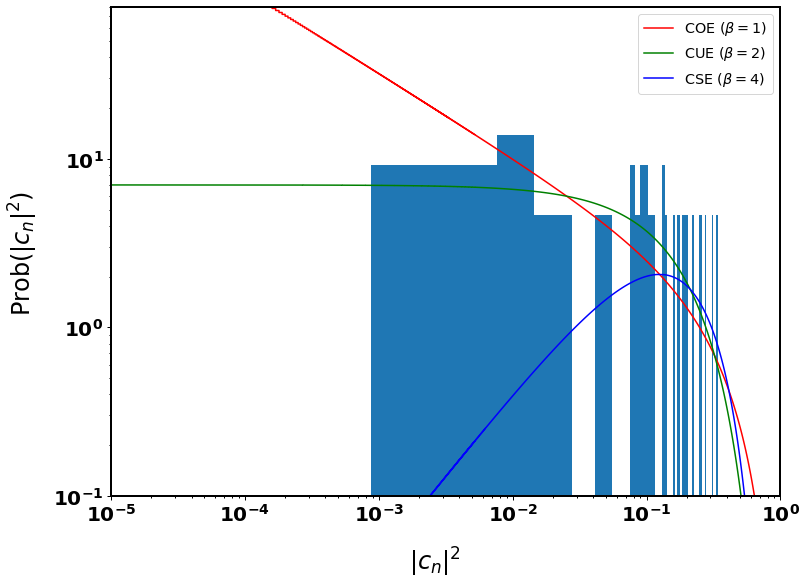

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


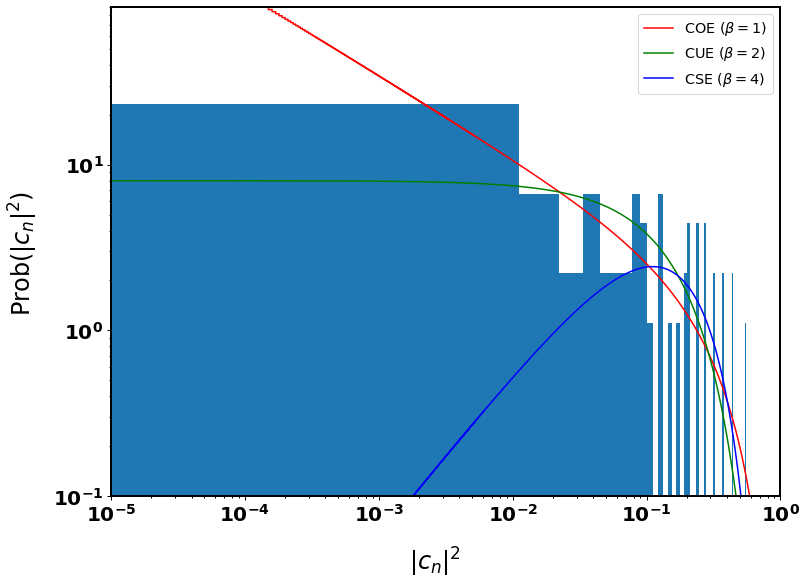

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


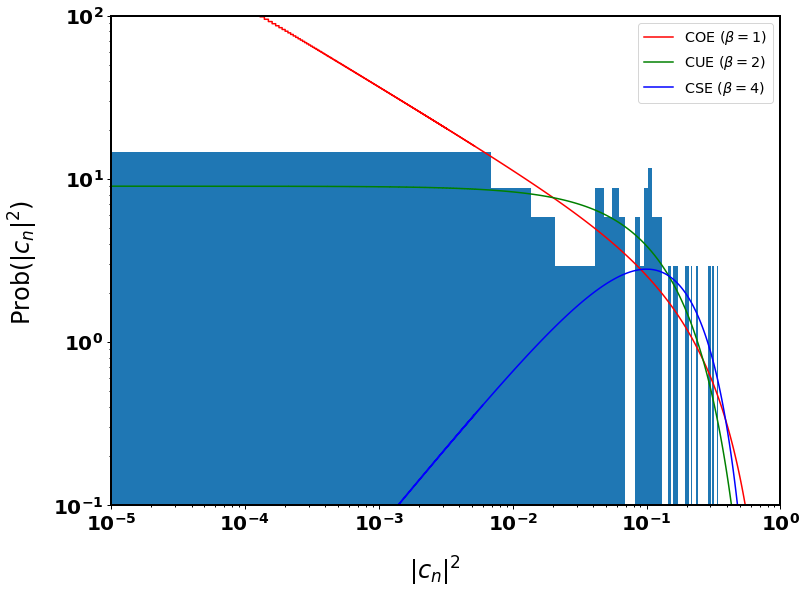

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


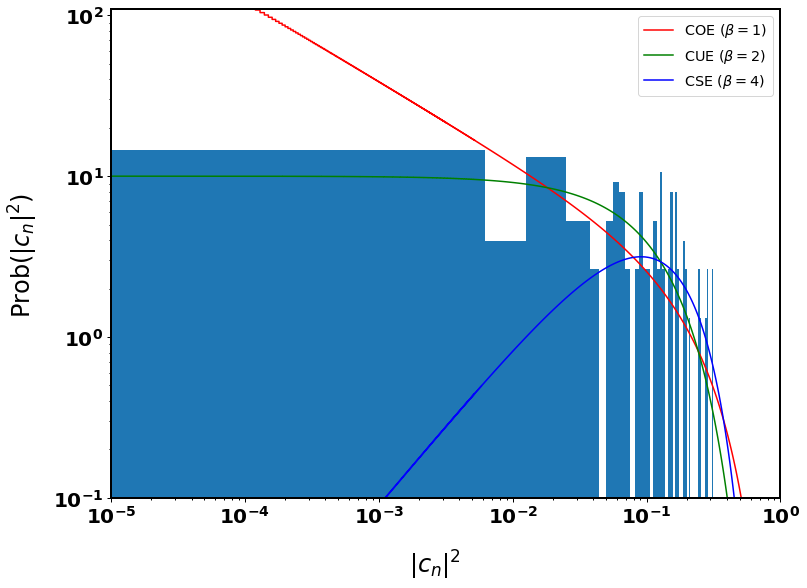

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


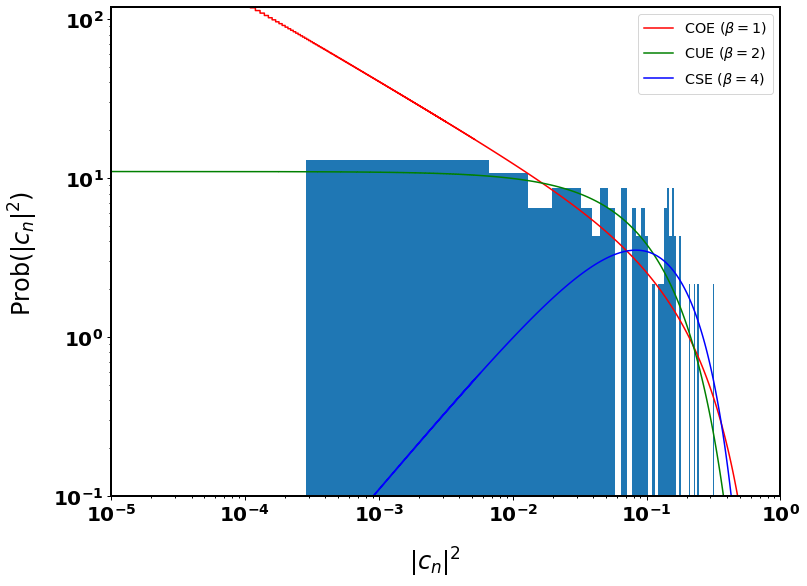

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


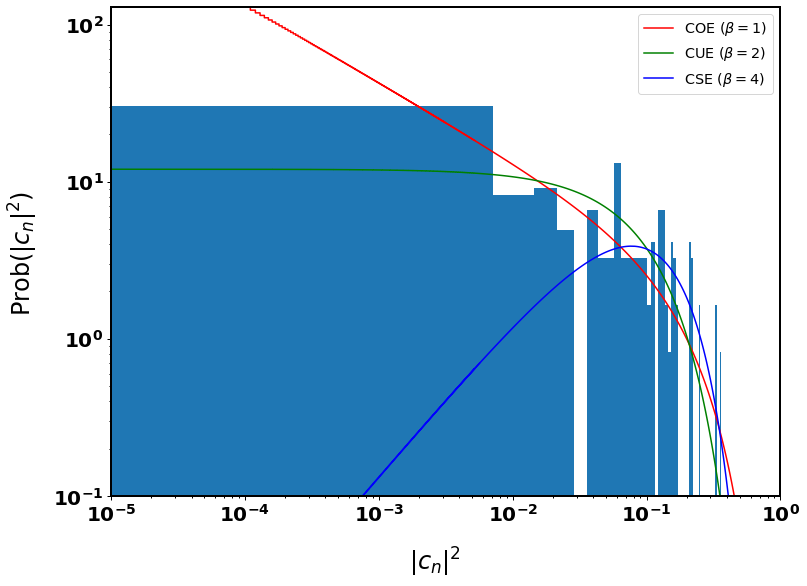

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


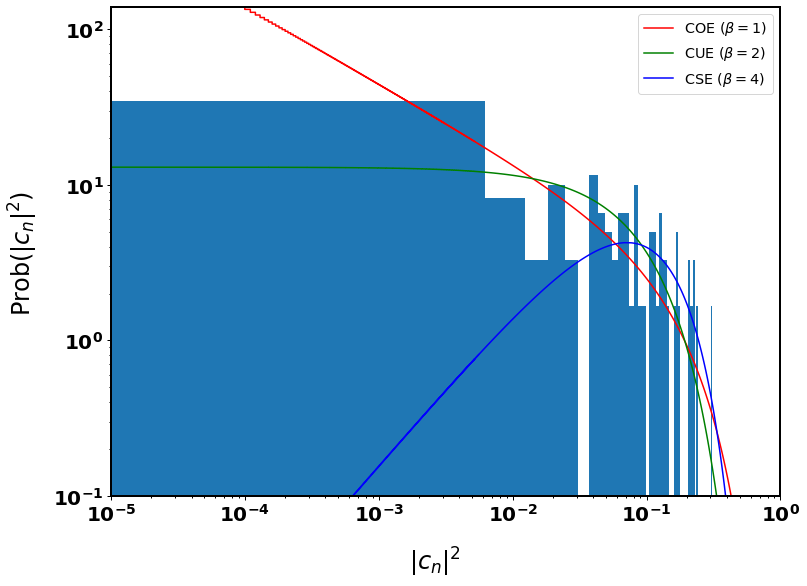

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


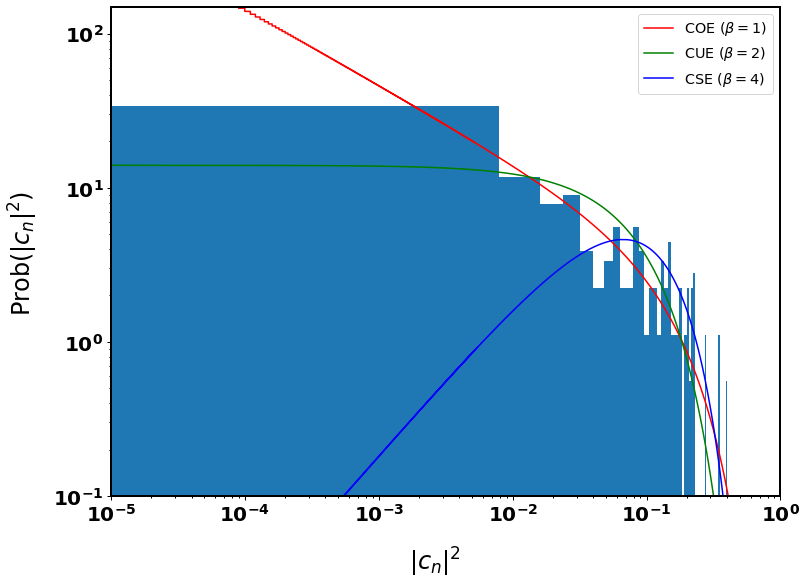

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


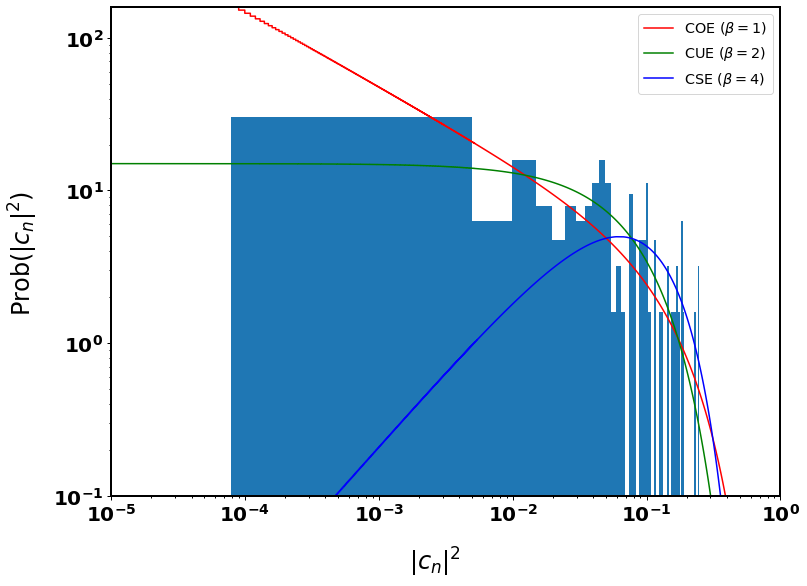

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [5]:
jlist = np.arange(0.5,10.5,0.5)
for jvalue in jlist:
    components = IsingDS(jvalue)
    sPlt.pltEig(components, Dims=((2*jvalue) + 1), Step=True, logScale=True)